In [1]:
import numpy as np
import pandas as pd

In [2]:

import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
!pip install transformers
!pip install beautifulsoup4

In [4]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [5]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')
model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [6]:
r = requests.get("https://www.yelp.com/biz/manam-taguig?osq=manam&start=10")
soup = BeautifulSoup(r.text, 'html.parser')
regex  = re.compile(".*comment.*")
results = soup.find_all("p", {"class": regex})
reviews = [result.text for result in results]

In [7]:
reviews

["Service was slow, probably to the vast menu it has. One dish came more than 45mins after ordering. Crispy Palabok, when sauced up the portion is really small and too much sauce. Tip: quick fix, place some pre blanched noodles underneath the crispy noodles to add volume. It's pancit don't scrimp on it. All the other dishes were very good though.",
 'Last year, I found myself celebrating Thanksgiving in the Philippines. Most of my family flew to Manila. In between the traffic, we took some time to explore the amazing food and culture this city had to offer.I think I was told that "Manam" translates to "eat" in Visayan, a Philippine language. I don\'t speak the language and at that moment in time, I was more interested in the taste of the food than in a language lesson. No matter the language, the food was mmm, mmm good.Manam serves classic Filipino comfort food with a twist. Some twists were more successful than others. The mango salad was very refreshing with shredded mango, sweet-tar

In [8]:
df = pd.DataFrame(np.array(reviews), columns = ["review"])
df

,review
0,"Service was slow, probably to the vast menu it..."
1,"Last year, I found myself celebrating Thanksgi..."
2,Two of us ordered:Adobong kangkong Beef belly ...
3,Seriously the best sisig ever of ALL time. Cru...
4,Local eatery in the BCG area serving local com...
5,Delicious Filipino restaurant that's got to be...
6,Delicious Filipino restaurant that's got to be...
7,"Service, class, a great aesthetic and excellen..."
8,Gosh I wish Manam was back home. This is a fan...
9,Being my first time to the Philippines I asked...


In [9]:
def sentiment_score(review):
  tokens = tokenizer.encode(review, return_tensors='pt')
  result = model(tokens)
  return int(torch.argmax(result.logits)) + 1


In [10]:
df['sentiment'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

In [11]:
df.tail()

,review,sentiment
6,Delicious Filipino restaurant that's got to be...,5
7,"Service, class, a great aesthetic and excellen...",5
8,Gosh I wish Manam was back home. This is a fan...,4
9,Being my first time to the Philippines I asked...,5
10,Love this restaurant. Fresh is the name of the...,5


In [12]:
df.sentiment.mean()

4.363636363636363

In [13]:
url_list = [
    "https://www.yelp.com/biz/manam-taguig?osq=manam",
    "https://www.yelp.com/biz/manam-taguig?osq=manam&start=20",
    "https://www.yelp.com/biz/manam-taguig?osq=manam&start=30",
    "https://www.yelp.com/biz/manam-taguig?osq=manam&start=40",
    "https://www.yelp.com/biz/manam-taguig?osq=manam&start=50",
    "https://www.yelp.com/biz/manam-taguig?osq=manam&start=60",
    "https://www.yelp.com/biz/manam-taguig?osq=manam&start=70",
    ]

In [14]:

all_reviews = []

for url in url_list:
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    regex = re.compile(".*comment.*")
    results = soup.find_all("p", {"class": regex})
    reviews = [result.text for result in results]

    all_reviews.extend(reviews)

# Create a DataFrame
df = pd.DataFrame(np.array(all_reviews), columns=["review"])
df['sentiment1'] = df['review'].apply(lambda x: sentiment_score(x[:512]))

df

,review,sentiment1
0,Let's just say I ate here three times in my ei...,5
1,"This is for the BGC location, but we've also e...",4
2,Our new fave Filipino restaurant not only for ...,5
3,Our new fave Filipino restaurant not only for ...,5
4,Great food but service sucks! Parking across t...,2
5,The food was great! Really love their mango po...,5
6,Delicious Filipino food. I recommend the sinig...,4
7,Food is delicious. Noisy ambience cause it's a...,2
8,Tried Manam for the first time while visiting ...,5
9,Service is beautiful .the patatim is delicious...,4


In [15]:
df.sentiment1.mean()

3.9827586206896552

In [16]:
import matplotlib.pyplot as plt

In [17]:
sentiment_counts = df.sentiment1.value_counts()

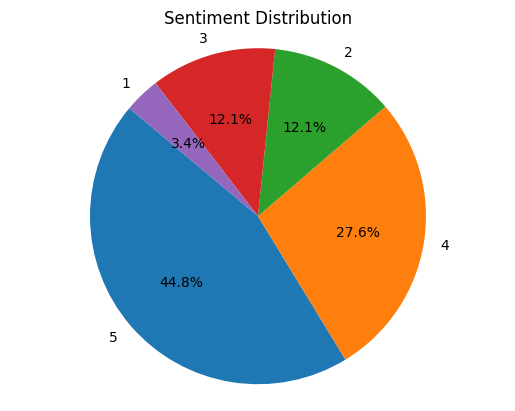

In [18]:
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution')
plt.show()

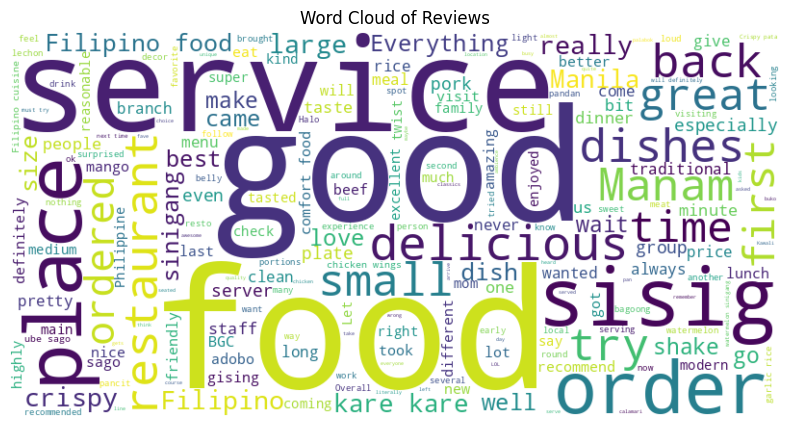

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_reviews_text = " ".join(all_reviews)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('Word Cloud of Reviews')
plt.show()